#Decision Tree Model

For classification of Processed Energy Dataset

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Importing modules and data

In [ ]:
import csv
import math
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #splitting dataset into train and test
from sklearn.tree import DecisionTreeClassifier      #to build Decision Tree model
from sklearn import metrics                          #to evaluate the model
from sklearn.feature_selection import RFE            #Recursive Feature Elimination
from sklearn.feature_selection import RFECV          #RFE with cross validation

df = pd.read_csv('/content/gdrive/MyDrive/fixed_data_train.csv')

In [ ]:
df.head()

,Unnamed: 0,client_id,district,client_catg,region,region_group,creation_date_day,creation_date_month,creation_date_year,no_months_as_client,...,tally_check_false,sum_tally_value,min_tally_value,max_tally_value,mean_tally_value,counter_type,last_year,last_month,last_day,last_day_is_weekday
0,0,train_Client_0,60,11,101,2,31,12,1994,290.568595,...,0,0,0,0,0.0,1,2019,3,19,1
1,1,train_Client_1,69,11,107,2,29,5,2002,202.123247,...,0,0,0,0,0.0,1,2019,4,2,1
2,2,train_Client_10,62,11,301,3,13,3,1986,397.642662,...,0,0,0,0,0.0,1,2019,5,2,1
3,3,train_Client_100,69,11,105,2,7,11,1996,190.591183,...,0,0,0,0,0.0,1,2012,9,25,1
4,4,train_Client_1000,62,11,303,3,14,10,2014,56.083287,...,0,0,0,0,0.0,1,2019,6,17,1


In [ ]:
df.describe()

,Unnamed: 0,district,client_catg,region,region_group,creation_date_day,creation_date_month,creation_date_year,no_months_as_client,services_consumed,...,tally_check_false,sum_tally_value,min_tally_value,max_tally_value,mean_tally_value,counter_type,last_year,last_month,last_day,last_day_is_weekday
count,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,...,135487.000000,1.354870e+05,1.354870e+05,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000,135487.000000
mean,67743.000000,63.511259,11.512529,206.159934,2.498107,17.470975,7.271701,2002.183818,172.017138,1.512248,...,0.139475,-3.627994e+02,-1.329520e+03,51.412423,-23.272190,1.447969,2016.589828,6.517415,14.643154,0.951073
std,39111.872298,3.354409,4.423857,104.207210,0.499998,8.718721,3.459091,11.565664,133.729199,0.574039,...,1.621926,1.400237e+05,1.825017e+04,3720.290015,3122.172847,0.507250,5.716077,3.164140,9.246802,0.215717
min,0.000000,60.000000,11.000000,101.000000,2.000000,1.000000,1.000000,1977.000000,-10.940676,1.000000,...,0.000000,-3.100000e+06,-1.097806e+06,-100000.000000,-500000.000000,0.000000,1977.000000,1.000000,1.000000,0.000000
25%,33871.500000,62.000000,11.000000,103.000000,2.000000,11.000000,4.000000,1994.000000,62.555699,1.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2018.000000,4.000000,6.000000,1.000000
50%,67743.000000,62.000000,11.000000,107.000000,2.000000,18.000000,8.000000,2005.000000,134.836444,1.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2019.000000,6.000000,15.000000,1.000000
75%,101614.500000,69.000000,11.000000,307.000000,3.000000,25.000000,10.000000,2012.000000,260.802070,2.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,2019.000000,9.000000,23.000000,1.000000
max,135486.000000,69.000000,51.000000,399.000000,3.000000,31.000000,12.000000,2019.000000,513.324709,6.000000,...,182.000000,2.518952e+07,5.328790e+05,628811.000000,589785.250000,2.000000,2019.000000,12.000000,31.000000,1.000000


##Splitting test and training data, cleaning data

In [ ]:
# Partion the features from the class to predict
df_X = df[df.columns[df.columns != 'target']].copy() 
#df_X["client_id"] = df_X["client_id"].str.split("_").str[-1]
df_X.drop(["client_id","Unnamed: 0"],axis = 1,inplace = True)
df_y = df['target'].copy() 


X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=1)

print ("Number of training instances: ", len(X_train), "\nNumber of test instances: ", len(X_test))

Number of training instances:  94840 
Number of test instances:  40647


In [ ]:
X_train.head()

,district,client_catg,region,region_group,creation_date_day,creation_date_month,creation_date_year,no_months_as_client,services_consumed,months_of_service,...,tally_check_false,sum_tally_value,min_tally_value,max_tally_value,mean_tally_value,counter_type,last_year,last_month,last_day,last_day_is_weekday
16031,62,11,301,3,27,9,1999,225.943038,1,162.401692,...,0,0,0,0,0.0,1,2018,7,26,1
27947,69,11,104,2,18,10,1995,180.537588,1,57.036079,...,0,0,0,0,0.0,1,2010,11,3,1
64148,63,11,311,3,14,6,2007,149.752562,1,149.292593,...,0,0,0,0,0.0,1,2019,12,6,1
1476,63,11,379,3,28,12,2011,91.730836,1,77.208978,...,0,0,0,0,0.0,1,2019,8,20,1
27331,63,11,101,2,26,6,2002,204.160250,2,156.717797,...,0,0,0,0,0.0,2,2019,7,1,1


In [ ]:
y_train.head()

16031    0
27947    0
64148    0
1476     0
27331    0
Name: target, dtype: int64

##Oversampling imbalanced data (of training  set)

In [ ]:
not_fraud = y_train[y_train == 0].index #Get index of rows that are not fraud
fraud = y_train[y_train == 1].index # #Get index of rows that are fraud
not_fraud = np.random.choice(not_fraud, len(fraud), replace=False) # Randomly pick not fraud rows without replacement until the len is the same as fruad
X_train = pd.concat([X_train.loc[not_fraud],X_train.loc[fraud]]) 
y_train = pd.concat([y_train.loc[not_fraud],y_train.loc[fraud]])

print("Training Data", len(X_train),len(y_train))

Training Data 10604 10604


### Helper function to evaluate the model using:
Accuracy

Precision

Recall

F1 Score

F2 Score

ROC-AUC

Confusion Matrix

In [ ]:
def evaluation(dt_model, X_train, y_train, X_test, y_test):
  train_accuracy = dt_model.score(X_train, y_train)
  test_accuracy = dt_model.score(X_test, y_test)
  predictions = dt_model.predict(X_test)
  precision = metrics.precision_score(y_test, predictions)
  recall = metrics.recall_score(y_test, predictions)
  f1 = metrics.f1_score(y_test, predictions)
  roc_auc = metrics.roc_auc_score(y_test, predictions)
  conf_mat = metrics.confusion_matrix(y_test, predictions)
  tn, fp, fn, tp = conf_mat.ravel()

  #for False Negatives
  f2 = metrics.fbeta_score(y_test, predictions, beta = 2.0)
  
  print('Decision Tree accuracy for training set: %f' % train_accuracy)
  print('Decision Tree accuracy for test set: %f' % test_accuracy)
  print("Precision: %f" % precision)
  print("Recall: %f" % recall)
  print("F1 score: %f" % f1)
  print("F2 score: %f" %f2)
  print("ROC AUC: %f" %roc_auc)
  print("Confusion matrix:")
  print(conf_mat)


##Building Decision Tree classifier with default parameters

In [ ]:
dt = DecisionTreeClassifier(
    criterion = "gini",               #function to measure the quality of a split
    splitter = "best",                #strategy to choose the split at each node
    max_depth = None,                 #maximum depth of the tree
    min_samples_split = 2,            #minimum samples required to split a node
    min_samples_leaf = 1,             #min number of samples required for a leaf node
    min_weight_fraction_leaf = 0.0,   #minimum weighted fraction of total weight at a leaf node
    max_features = None,              #number of features considered when looking for the best split
    random_state = None,              #controls the randomness of the estimator
    max_leaf_nodes = None,            #maximum number of leaf nodes
    min_impurity_decrease = 0.0,      #minimum threshold of decrease in impurity 
                                      #to decide if a node will be split
    class_weight = None,              #weights associated with the classes
    ccp_alpha = 0.0                   #maximum threshold of cost complexity 
)

In [ ]:
# Fix the random seed for decision tree classifier
np.random.seed(seed = 0)
dt_model = dt.fit(X_train, y_train)

In [ ]:
print("Using default Decision Tree Classifier")
evaluation(dt_model, X_train, y_train, X_test, y_test)

Using default Decision Tree Classifier
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.708638
Precision: 0.125498
Recall: 0.708922
F1 score: 0.213247
F2 score: 0.367361
ROC AUC: 0.708772
Confusion matrix:
[[27199 11184]
 [  659  1605]]


##Changing the parameters of Decision Tree Classifier

In [ ]:
dt_1 = DecisionTreeClassifier(criterion = "entropy") #splitter = best
dt_model_1 = dt_1.fit(X_train,y_train)

In [ ]:
print("Using Entropy Loss as the criterion to split the branches")
evaluation(dt_model_1, X_train, y_train, X_test, y_test)

Using Entropy Loss as the criterion to split the branches
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.713165
Precision: 0.126560
Recall: 0.703180
F1 score: 0.214512
F2 score: 0.367922
ROC AUC: 0.708467
Confusion matrix:
[[27396 10987]
 [  672  1592]]


In [ ]:
dt_2 = DecisionTreeClassifier(criterion = "entropy", class_weight = {0: 1.0, 1: 2.0 })
dt_model_2 = dt_2.fit(X_train, y_train)

In [ ]:
print("Using Entropy Loss as the criterion to split the branches, with more weight on Fraud class")
evaluation(dt_model_2, X_train, y_train, X_test, y_test)

Using Entropy Loss as the criterion to split the branches, with more weight on Fraud class
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.713165
Precision: 0.127035
Recall: 0.706714
F1 score: 0.215358
F2 score: 0.369498
ROC AUC: 0.710129
Confusion matrix:
[[27388 10995]
 [  664  1600]]


###Hyperparameter tuning using For Loop

In [ ]:
#Don't allow more than M level of tests
#by changing max depth
train_list = []
test_list = []
depth_list = range(1,21)

for depth in range(1,21):
  np.random.seed(seed=0)
  model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
  model.fit(X_train, y_train)
  train_accuracy = model.score(X_train, y_train)
  test_accuracy = model.score(X_test, y_test)
  
  train_list.append(train_accuracy)
  test_list.append(test_accuracy)

  print("Train accuracy for depth %d: %f" %(depth, train_accuracy))
  print("Test accuracy for depth %d: %f" %(depth, test_accuracy))
  print()

Train accuracy for depth 1: 0.657959
Test accuracy for depth 1: 0.507418

Train accuracy for depth 2: 0.700868
Test accuracy for depth 2: 0.546510

Train accuracy for depth 3: 0.700868
Test accuracy for depth 3: 0.546510

Train accuracy for depth 4: 0.730668
Test accuracy for depth 4: 0.815017

Train accuracy for depth 5: 0.759902
Test accuracy for depth 5: 0.680911

Train accuracy for depth 6: 0.768578
Test accuracy for depth 6: 0.675130

Train accuracy for depth 7: 0.784232
Test accuracy for depth 7: 0.756710

Train accuracy for depth 8: 0.792625
Test accuracy for depth 8: 0.764484

Train accuracy for depth 9: 0.804131
Test accuracy for depth 9: 0.757424

Train accuracy for depth 10: 0.825349
Test accuracy for depth 10: 0.754496

Train accuracy for depth 11: 0.844493
Test accuracy for depth 11: 0.783625

Train accuracy for depth 12: 0.865428
Test accuracy for depth 12: 0.778827

Train accuracy for depth 13: 0.885986
Test accuracy for depth 13: 0.772234

Train accuracy for depth 14: 0

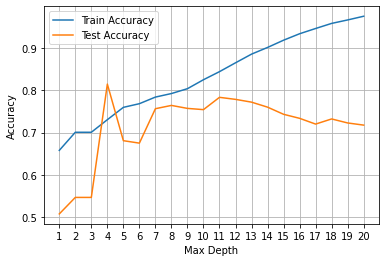

In [ ]:
plt.plot(depth_list, train_list, label = "Train Accuracy")
plt.plot(depth_list, test_list, label = "Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.grid()
plt.show()

From the graph, the best max depth value is 8, before the model starts to overfit.

In [ ]:
dt_3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 8) #splitter = best
dt_model_3 = dt_3.fit(X_train,y_train)
evaluation(dt_model_3, X_train, y_train, X_test, y_test)

Decision Tree accuracy for training set: 0.792625
Decision Tree accuracy for test set: 0.764927
Precision: 0.161104
Recall: 0.765459
F1 score: 0.266185
F2 score: 0.437339
ROC AUC: 0.765178
Confusion matrix:
[[29359  9024]
 [  531  1733]]


[Text(0.4490799492385787, 0.9444444444444444, 'X[10] <= 1.5\nentropy = 1.0\nsamples = 10604\nvalue = [5302, 5302]'),
 Text(0.28331218274111675, 0.8333333333333334, 'X[12] <= 1.5\nentropy = 0.83\nsamples = 3521\nvalue = [2598, 923]'),
 Text(0.1567258883248731, 0.7222222222222222, 'X[28] <= 7491.5\nentropy = 0.733\nsamples = 3215\nvalue = [2554, 661]'),
 Text(0.05012690355329949, 0.6111111111111112, 'X[39] <= 2010.5\nentropy = 0.465\nsamples = 1633\nvalue = [1472, 161]'),
 Text(0.015228426395939087, 0.5, 'X[0] <= 66.0\nentropy = 0.022\nsamples = 460\nvalue = [459, 1]'),
 Text(0.01015228426395939, 0.3888888888888889, 'entropy = 0.0\nsamples = 372\nvalue = [372, 0]'),
 Text(0.02030456852791878, 0.3888888888888889, 'X[5] <= 4.5\nentropy = 0.09\nsamples = 88\nvalue = [87, 1]'),
 Text(0.015228426395939087, 0.2777777777777778, 'X[32] <= 1.5\nentropy = 0.286\nsamples = 20\nvalue = [19, 1]'),
 Text(0.01015228426395939, 0.16666666666666666, 'X[6] <= 1993.0\nentropy = 0.811\nsamples = 4\nvalue = [

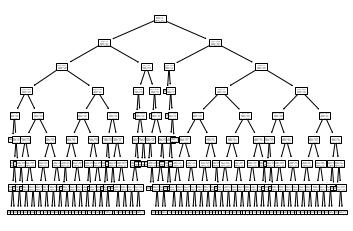

In [ ]:
import sklearn.tree as tree

tree.plot_tree(dt_3)

## With RFE

In [ ]:
rfe = RFE(estimator = dt) #n_features_to_select default half
rfe_model = rfe.fit(X_train, y_train)
rfe_model.get_feature_names_out()

array(['district', 'region', 'creation_date_day', 'creation_date_year',
       'no_months_as_client', 'months_of_service', 'number_of_counter',
       'number_of_instances', 'number_of_person_counting',
       'mean_reading_remark', 'mean_difference_index',
       'sum_difference_index', 'max_difference_index',
       'mean_counter_statue', 'sum_total_consumption',
       'mean_total_consumption', 'max_total_consumption', 'counter_type',
       'last_year', 'last_month', 'last_day'], dtype=object)

In [ ]:
print("Using RFE to remove useless features:")
evaluation(rfe_model, X_train, y_train, X_test, y_test)

Using RFE to remove useless features:
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.704972
Precision: 0.122184
Recall: 0.694788
F1 score: 0.207821
F2 score: 0.358641
ROC AUC: 0.700180
Confusion matrix:
[[27082 11301]
 [  691  1573]]


In [ ]:
rfe_1 = RFE(estimator = dt_1)
rfe_model_1 = rfe_1.fit(X_train, y_train)
rfe_model_1.get_feature_names_out()
evaluation(rfe_model_1, X_train, y_train, X_test, y_test)

Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.709499
Precision: 0.126195
Recall: 0.711572
F1 score: 0.214371
F2 score: 0.369123
ROC AUC: 0.710474
Confusion matrix:
[[27228 11155]
 [  653  1611]]


In [ ]:
rfe_2 = RFE(estimator = dt_2)
rfe_model_2 = rfe_2.fit(X_train, y_train)
rfe_model_2.get_feature_names_out()
evaluation(rfe_model_2, X_train, y_train, X_test, y_test)

Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.710212
Precision: 0.126188
Recall: 0.709364
F1 score: 0.214262
F2 score: 0.368636
ROC AUC: 0.709813
Confusion matrix:
[[27262 11121]
 [  658  1606]]


In [ ]:
rfe_3 = RFE(estimator = dt_3)
rfe_model_3 = rfe_3.fit(X_train, y_train)
rfe_model_3.get_feature_names_out()
evaluation(rfe_model_3, X_train, y_train, X_test, y_test)

Decision Tree accuracy for training set: 0.792154
Decision Tree accuracy for test set: 0.764140
Precision: 0.161442
Recall: 0.771201
F1 score: 0.266993
F2 score: 0.439334
ROC AUC: 0.767462
Confusion matrix:
[[29314  9069]
 [  518  1746]]


##Using RFE with cross validation

In [ ]:

rfecv = RFECV(dt_3, step = 1 ,cv = 5, scoring = "accuracy")
rfecv_model = rfecv.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


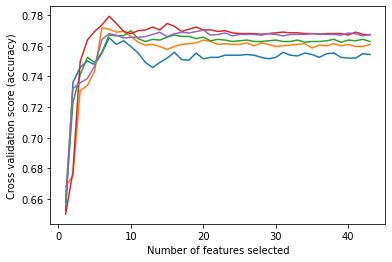

In [ ]:
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
xPos = range(1, len(rfecv.grid_scores_) + 1)
plt.plot(xPos,rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.n_features_

7

In [ ]:
print("Using RFE with 5 fold validation:")
evaluation(rfecv_model, X_train, y_train, X_test, y_test)

Using RFE with 5 fold validation:
Decision Tree accuracy for training set: 0.789230
Decision Tree accuracy for test set: 0.754447
Precision: 0.159294
Recall: 0.796820
F1 score: 0.265509
F2 score: 0.442569
ROC AUC: 0.774384
Confusion matrix:
[[28862  9521]
 [  460  1804]]


#References

1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html?highlight=rfe#sklearn.feature_selection.RFE

4. https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=tree

5. https://ai.plainenglish.io/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda

6. https://www.section.io/engineering-education/hyperparmeter-tuning/

7. https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/how-to-penalize-decision-tree-for-misclassifying-a-certain-class
